## Setting the working Directory

In [4]:
import os
os.chdir('C:/Users/Acharya/Desktop/Housing')
os.getcwd()

'C:\\Users\\Acharya\\Desktop\\Housing'

## Importing the Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

## Loading and Exploring the Dataset

In [6]:
dataset=pd.read_csv("housing.csv")

In [7]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
dataset['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Data Visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CBAE7BBC88>,
      dtype=object)

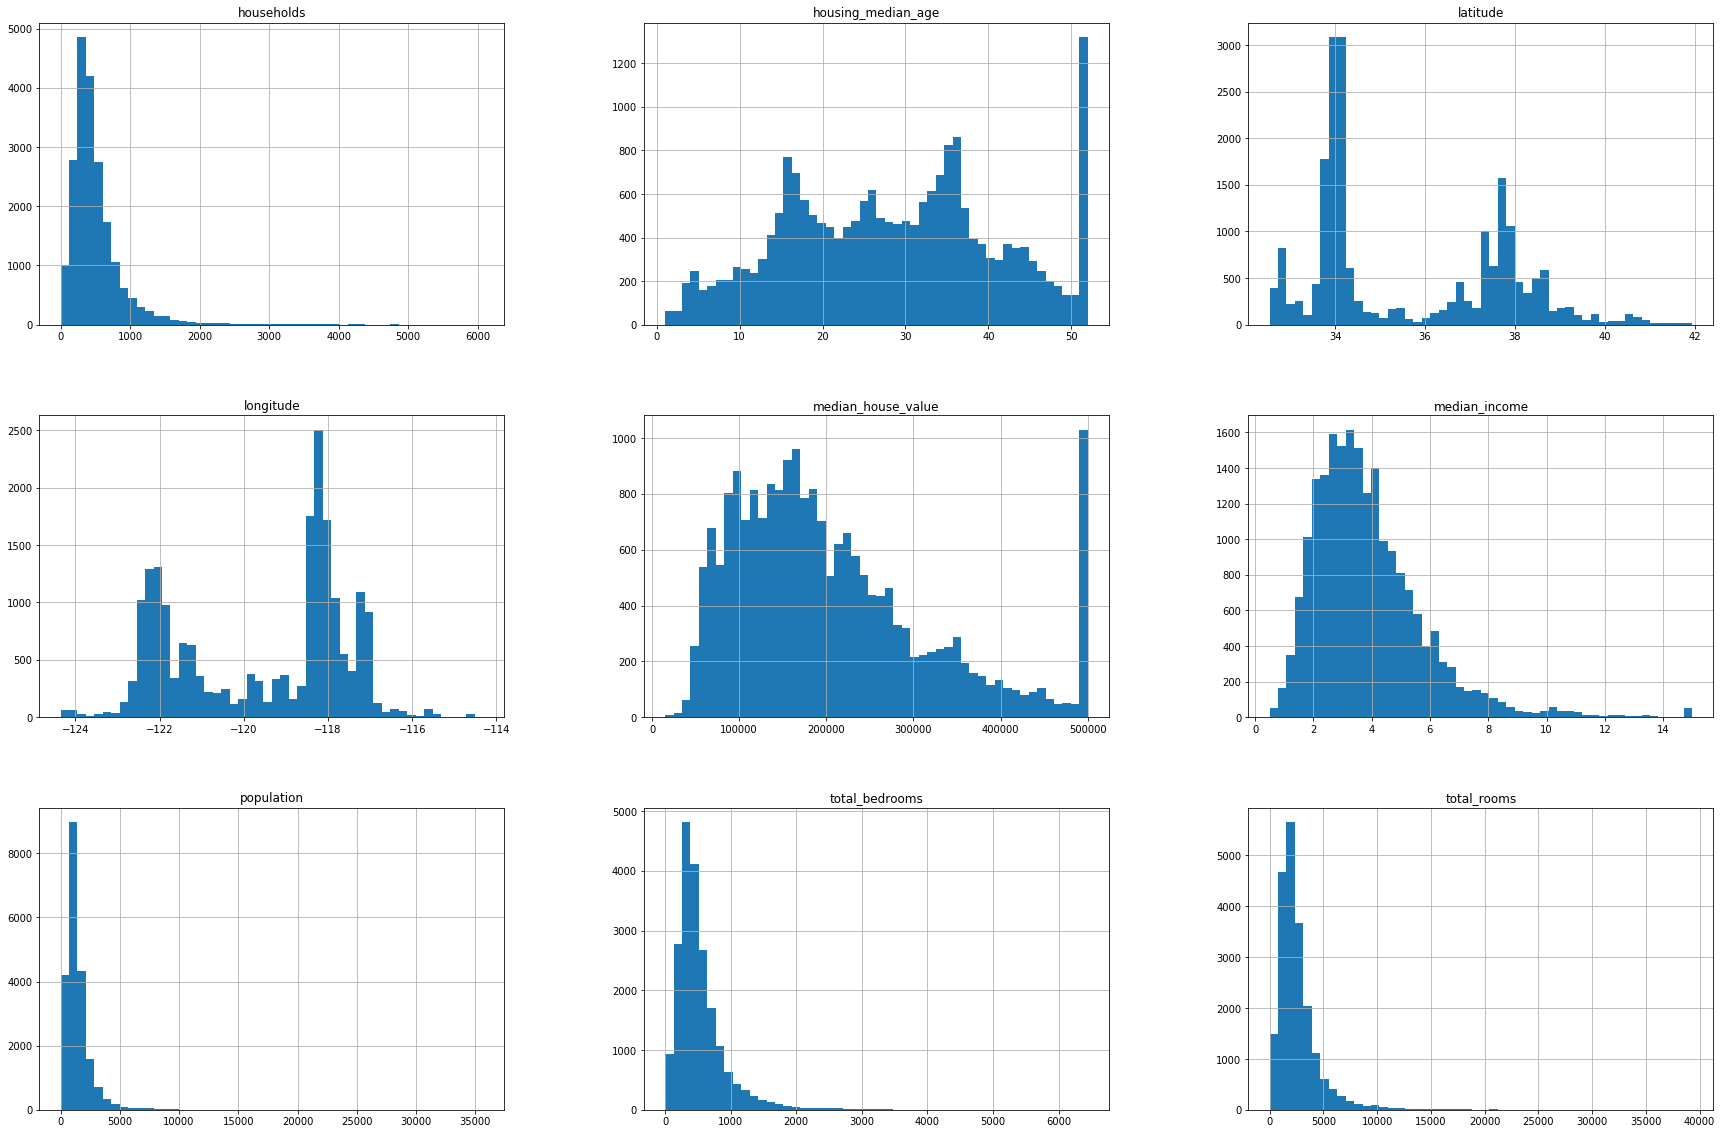

In [11]:
dataset.hist(bins=50,figsize=(30,20))

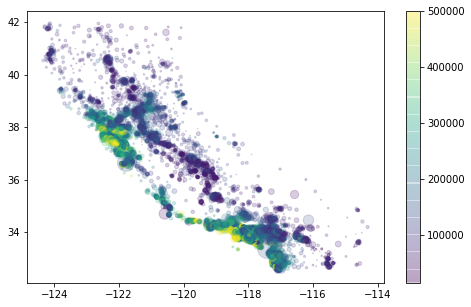

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(x=dataset.longitude, y=dataset.latitude,alpha=0.2,c=dataset.median_house_value,s=dataset.population/100)
plt.colorbar()


## Handling Missing Data

In [13]:
median = dataset["total_bedrooms"].median()
dataset["total_bedrooms"].fillna(median, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Dividing Dataset into Independent Variables and Dependent Variables

### X is Independent Variables and Y is Dependent Variable

In [14]:
X=dataset.drop('median_house_value',axis=1)
Y=dataset['median_house_value']

## Handling Categorical Variables and Dummy Variable Trap

In [15]:
dummies=pd.get_dummies(X['ocean_proximity'])
X=X.join(dummies)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,0,0,0,1,0


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
<1H OCEAN             20640 non-null uint8
INLAND                20640 non-null uint8
ISLAND                20640 non-null uint8
NEAR BAY              20640 non-null uint8
NEAR OCEAN            20640 non-null uint8
dtypes: float64(8), object(1), uint8(5)
memory usage: 1.5+ MB


In [17]:
X=X.drop('<1H OCEAN',axis=1)
X=X.drop('ocean_proximity',axis=1)

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
INLAND                20640 non-null uint8
ISLAND                20640 non-null uint8
NEAR BAY              20640 non-null uint8
NEAR OCEAN            20640 non-null uint8
dtypes: float64(8), uint8(4)
memory usage: 1.3 MB


## Spliting Data into Training and Test Set

In [19]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=143)
print("X_Train Set",len(X_train))
print("X_Test Set",len(X_test))
print("Y_Train Set",len(Y_train))
print("Y_Test Set",len(Y_test))

X_Train Set 16512
X_Test Set 4128
Y_Train Set 16512
Y_Test Set 4128


## Model Creation using Linear Regression

In [20]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
Y_pred=regressor.predict(X_test)
Y_pred

array([168594.84520048, 292322.74291219, 131587.83185124, ...,
       113453.93174537, 232017.62419617, 237401.86830014])

In [22]:
score=r2_score(Y_test,Y_pred)
print(score*100)
print(round(score*100),"% Accuracy")

63.94433518894762
64.0 % Accuracy


## Model Creation using Random Forest (Non-Linear Model)

In [23]:
randreg=RandomForestRegressor(n_estimators=500,random_state=143)
randreg.fit(X_train,Y_train)
yrand=randreg.predict(X_test)

In [34]:
yrand

array([182654.802, 321836.202, 231693.754, ..., 133997.2  , 189351.   ,
       271304.   ])

In [35]:
score1=r2_score(Y_test,yrand)
print(score1*100)
print(round(score1*100),"% Accuracy")

81.90210676988397
82.0 % Accuracy
